In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('/content/Time_UoM_Data.xlsx')

In [7]:
df.head()

,Year,ss,FSR,FQE,FRU,OE,PU,QP,IPR,FPPP,GUE,GPHD,RD,WD,ESCS,PCS,PR+ Acer
0,2021,15.42,14.55,9.85,6.77,3.0,6.88,8.12,2.0,2.08,60.0,18.35,2.76,22.44,2.58,20.0,5.23
1,2022,15.72,16.01,10.57,10.87,2.0,7.27,8.44,5.0,1.82,60.0,22.54,2.85,28.93,4.17,20.0,35.08
2,2023,14.39,16.49,10.88,11.90,2.5,6.93,8.67,1.0,1.22,60.0,26.24,2.80,29.43,4.04,20.0,35.47


In [8]:
df.set_index('Year', inplace=True)

In [9]:
df.head()

,ss,FSR,FQE,FRU,OE,PU,QP,IPR,FPPP,GUE,GPHD,RD,WD,ESCS,PCS,PR+ Acer
Year,,,,,,,,,,,,,,,,
2021,15.42,14.55,9.85,6.77,3.0,6.88,8.12,2.0,2.08,60.0,18.35,2.76,22.44,2.58,20.0,5.23
2022,15.72,16.01,10.57,10.87,2.0,7.27,8.44,5.0,1.82,60.0,22.54,2.85,28.93,4.17,20.0,35.08
2023,14.39,16.49,10.88,11.90,2.5,6.93,8.67,1.0,1.22,60.0,26.24,2.80,29.43,4.04,20.0,35.47


In [10]:
df.describe()

,ss,FSR,FQE,FRU,OE,PU,QP,IPR,FPPP,GUE,GPHD,RD,WD,ESCS,PCS,PR+ Acer
count,3.000000,3.000000,3.000000,3.000000,3.00,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.000000
mean,15.176667,15.683333,10.433333,9.846667,2.50,7.026667,8.410000,2.666667,1.706667,60.0,22.376667,2.803333,26.933333,3.596667,20.0,25.260000
std,0.697591,1.010412,0.528425,2.713786,0.50,0.212211,0.276225,2.081666,0.441059,0.0,3.947535,0.045092,3.899363,0.882855,0.0,17.347585
min,14.390000,14.550000,9.850000,6.770000,2.00,6.880000,8.120000,1.000000,1.220000,60.0,18.350000,2.760000,22.440000,2.580000,20.0,5.230000
25%,14.905000,15.280000,10.210000,8.820000,2.25,6.905000,8.280000,1.500000,1.520000,60.0,20.445000,2.780000,25.685000,3.310000,20.0,20.155000
50%,15.420000,16.010000,10.570000,10.870000,2.50,6.930000,8.440000,2.000000,1.820000,60.0,22.540000,2.800000,28.930000,4.040000,20.0,35.080000
75%,15.570000,16.250000,10.725000,11.385000,2.75,7.100000,8.555000,3.500000,1.950000,60.0,24.390000,2.825000,29.180000,4.105000,20.0,35.275000
max,15.720000,16.490000,10.880000,11.900000,3.00,7.270000,8.670000,5.000000,2.080000,60.0,26.240000,2.850000,29.430000,4.170000,20.0,35.470000


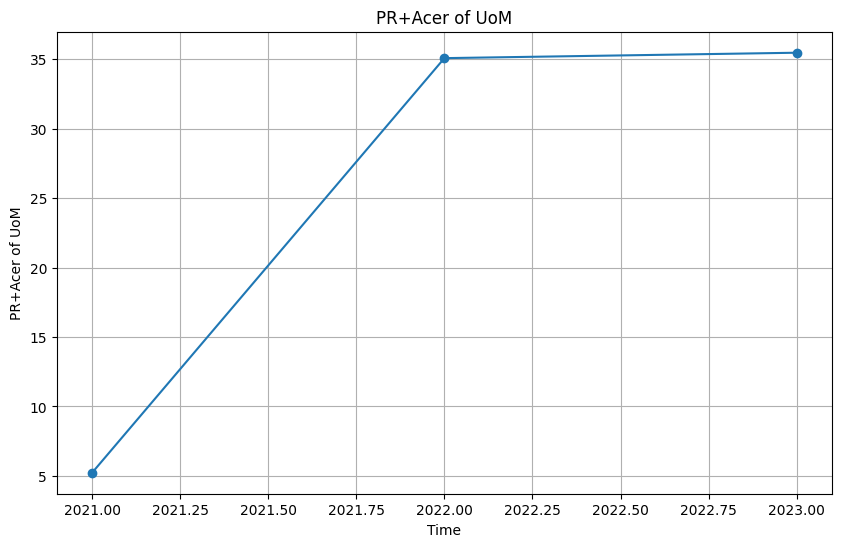

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(df.index, df['PR+ Acer'], marker='o',linestyle='-')
plt.title('PR+Acer of UoM')
plt.xlabel('Time')
plt.ylabel('PR+Acer of UoM')
plt.grid(True)
plt.show()

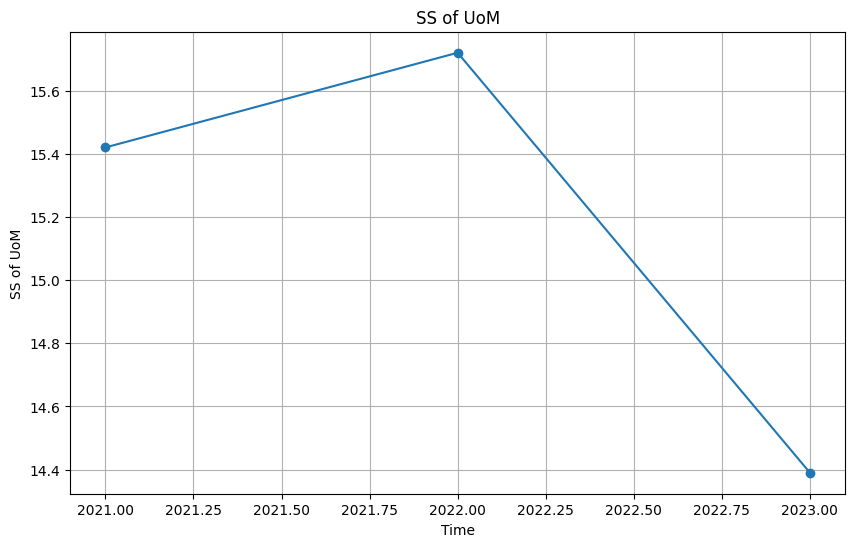

In [12]:
plt.figure(figsize = (10,6))
plt.plot(df.index, df['ss'], marker='o',linestyle='-')
plt.title('SS of UoM')
plt.xlabel('Time')
plt.ylabel('SS of UoM')
plt.grid(True)
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(WPI):
  result = adfuller(WPI)
  lables = ['ADF Test stats', 'p-value', 'lags used', 'no of obs used']
  for value, label in zip(result, lables):
    print(label + ':' + str(value))
  if result[1] <= 0.05:
    print('Data is stationary')
  else:
    print('data is not stationary')

In [15]:
adfuller_test(df['PR+ Acer'])

ValueError: sample size is too short to use selected regression component

In [16]:
from statsmodels.tsa.stattools import kpss

kpss_stat, kpss_p_value, _, _ = kpss(df['PR+ Acer'])
print('KPSS Statistic:', kpss_stat)
print('p-value:', kpss_p_value)

KPSS Statistic: 0.3333333333333336
p-value: 0.1


<ipython-input-16-cbe106f35d37>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p_value, _, _ = kpss(df['PR+ Acer'])
